# <p style="text-align: center;"> <b> Asking some meaningful questions about the data </b></p>

---

<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: left; background-color: #EDC0C7; font-family: newtimeroman; color: black; padding: 14px; line-height: 1; border-radius: 10px"><b> 🔖Mục lục </b></h3>
    <ul>
        <li><a href="#1" class="list-group-item list-group-item-action">1. Khai báo thư viện</a></li>
        <li><a href="#2" class="list-group-item list-group-item-action">2. Sơ bộ về dữ liệu sau khi xử lý</a></li>
        <li><a href="#3" class="list-group-item list-group-item-action">3. Câu hỏi</a></li>
        <ul>
            <li><a href="#Q1" class="list-group-item list-group-item-action">Câu hỏi 1</a></li>
            <li><a href="#Q2" class="list-group-item list-group-item-action">Câu hỏi 2</a></li>
            <li><a href="#Q3" class="list-group-item list-group-item-action">Câu hỏi 3</a></li>
            <li><a href="#Q4" class="list-group-item list-group-item-action">Câu hỏi 4</a></li>
        </ul>
        <li><a href="#4" class="list-group-item list-group-item-action">4. Cảm nghĩ</a></li>
        <li><a href="#5" class="list-group-item list-group-item-action">5. Tài liệu tham khảo</a></li>
    </ul>
</div>

<a class="anchor" id="1"></a>
## <div style="text-align: left; background-color:#EDC0C7; font-family:newtimeroman;color: black; padding: 14px; line-height: 1;border-radius:10px">1. Khai báo thư viện</div>

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import re
# from datetime import datetime
import datetime as dt
# from collections import Counter
import warnings
from ast import literal_eval
from sklearn.preprocessing import MinMaxScaler

# Turn off warnings
warnings.filterwarnings("ignore")

<a class="anchor" id="2"></a>
## <div style="text-align: left; background-color:#EDC0C7; font-family:newtimeroman;color: black; padding: 14px; line-height: 1;border-radius:10px">2. Sơ bộ về dữ liệu sau khi đã xử lý </div>

In [36]:
pd.set_option('display.max_columns', None)
anime_df = pd.read_csv('../data/processed_data.csv')
anime_df.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Premiered,Producers,Studios,Source,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Mins_per_ep,Start Date
0,1,Cowboy Bebop,8.78,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",Cowboy Bebop,カウボーイビバップ,TV,26.0,Spring 1998,['Bandai Visual'],['Sunrise'],Original,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,24.0,1998-04-03
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"['Action', 'Drama', 'Mystery', 'Sci-Fi', 'Space']",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1.0,Unknown,"['Sunrise', 'Bandai Visual']",['Bones'],Original,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0,115.0,2001-09-01
2,6,Trigun,8.24,"['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...",Trigun,トライガン,TV,26.0,Spring 1998,['Victor Entertainment'],['Madhouse'],Manga,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0,24.0,1998-04-01
3,7,Witch Hunter Robin,7.27,"['Action', 'Mystery', 'Police', 'Supernatural'...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26.0,Summer 2002,"['TV Tokyo', 'Bandai Visual', 'Dentsu', 'Victo...",['Sunrise'],Original,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0,25.0,2002-07-02
4,8,Bouken Ou Beet,6.98,"['Adventure', 'Fantasy', 'Shounen', 'Supernatu...",Beet the Vandel Buster,冒険王ビィト,TV,52.0,Fall 2004,"['TV Tokyo', 'Dentsu']",['Toei Animation'],Manga,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0,23.0,2004-09-30


In [37]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MAL_ID         17562 non-null  int64  
 1   Name           17562 non-null  object 
 2   Score          12421 non-null  float64
 3   Genres         17562 non-null  object 
 4   English name   17562 non-null  object 
 5   Japanese name  17562 non-null  object 
 6   Type           17562 non-null  object 
 7   Episodes       17046 non-null  float64
 8   Premiered      17562 non-null  object 
 9   Producers      17562 non-null  object 
 10  Studios        17562 non-null  object 
 11  Source         17562 non-null  object 
 12  Rating         17562 non-null  object 
 13  Ranked         15800 non-null  float64
 14  Popularity     17562 non-null  int64  
 15  Members        17562 non-null  int64  
 16  Favorites      17562 non-null  int64  
 17  Watching       17562 non-null  int64  
 18  Comple

<a class="anchor" id="3"></a>
## <div style="text-align: left; background-color:#EDC0C7; font-family:newtimeroman;color: black; padding: 14px; line-height: 1;border-radius:10px">3. Câu hỏi</div>

<a class="anchor" id="Q1"></a>
<button style="--color:#f3738a;--border:2px;--slant:.5em">Câu hỏi 1</button>

<style>
button {
  --border: 5px;    /* the border width */
  --slant: 0.7em;   /* control the slanted corners */
  --color: #37E8FC; /* the color */
  
  font-size: 35px;
  padding: 0.4em 1.2em;
  border: none;
  cursor: pointer;
  font-weight: bold;
  color: var(--color);
  background: 
     linear-gradient(to bottom left,var(--color)  50%,#0000 50.1%) top right,
     linear-gradient(to top   right,var(--color)  50%,#0000 50.1%) bottom left;
  background-size: calc(var(--slant) + 1.3*var(--border)) calc(var(--slant) + 1.3*var(--border));
  background-repeat: no-repeat;
  box-shadow:
    0 0 0 200px inset var(--s,#0000),
    0 0 0 var(--border) inset var(--color);
  clip-path: 
      polygon(0 0, calc(100% - var(--slant)) 0, 100% var(--slant),
              100% 100%, var(--slant) 100%,0 calc(100% - var(--slant))
             );
  transition: color var(--t,0.3s), background-size 0.3s;
}
button:focus-visible {
  outline-offset: calc(-1*var(--border));
  outline: var(--border) solid #000c;
  clip-path: none;
  background-size: 0 0;
}
button:hover,
button:active{
  background-size: 100% 100%;
  color: #fff;
  --t: 0.2s 0.1s;
}
button:active {
  --s: #0005;
  transition: none;
}



body {
  display:grid;
  grid-auto-flow:column;
  grid-gap:20px;
  place-content:center;
  margin:0;
  height:100vh;
}
</style>

### <span style='color:#2B9C15 '> ❓ CÂU HỎI </span>
+ **Câu 1: Sự khác nhau giữa thể loại Anime các nhà sản xuất ưa chuộng và thể loại được người dùng xem nhiều ?**

### <span style='color:#2B9C15 '>⭐ MỤC ĐÍCH </span>
+ Hiểu rõ hơn về thị hiếu của người dùng và xu hướng sản xuất nội dung của các nhà sản xuất trong ngành công nghiệp Anime.
+ Có thể giúp các nhà sản xuất hiểu rõ khẩu vị xem Anime của người dùng và sản xuất theo đúng nhu cầu.
+ Khám phá được thể loại sẽ thu hút người xem và thấy được xếp hạng các thể loại theo lượt xem trung bình.
+ Khám phá được thể loại thường được nhà sản xuất lựa chọn. 
+ Thống kê, phân tích số anime được sản xuất của từng thể loại. Và thống kê lượt xem trung bình của người dùng đối với từng thể loại.

### <span style='color:#2B9C15 '>📊 PHÂN TÍCH </span>
+ Đầu tiên, tính số nhà sản xuất lựa chọn sản xuất thể loại đó.
+ Tiếp theo, tính số lượt xem trung bình của từng thể loại.
+ Cuối cùng là trực quan hóa thành biểu đồ để dễ phân tích.

### 👉 1.1 Tiền xử lý 

Đầu tiên, ta sẽ chuyển dữ liệu của cột `Genres` và `Producers` về dạng list.

Tiếp theo, ta sẽ phân rã cột `Genres` trong tập dữ liệu bởi vì ban đầu mỗi dòng dữ liệu của cột `Genres` là 1 list các thể loại. Sau khi phân rã thì mỗi dòng dữ liệu của cột `Genres` sẽ chỉ chứa 1 thể loại. Ví dụ, ban đầu bộ anime với ID là 0 là anime thuộc 3 thể loại Comedy, Action và Drama thì sau khi phân rã trong tập dữ liệu dòng đó sẽ biến thành 3 dòng với mỗi dùng đều là thông tin của bộ anime đó nhưng khác ở cột `Genres` chỉ chứa 1 thể loại. 

In [38]:
anime_copy_df = anime_df.copy()
anime_copy_df['Genres'] = anime_copy_df['Genres'].apply(eval)
anime_copy_df['Producers'] = anime_copy_df['Producers'].apply(eval)

df_genres_expanded = anime_copy_df.explode('Genres').reset_index()

### 👉 1.2 Phân tích và thống kê 

Những bước sau ta sẽ thực hiện trên tập dữ liệu đã được phân rã cột `Genres`.

Gom nhóm theo thể loại và tính trung bình trên cột `Watching`. Sau đó ta lại phân rã dữ liệu gốc dựa vào cột `Producers` và lưu vào biến `df_producers_expanded`. Tiếp theo, ta tiến hành ghép 2 dữ liệu phân rã dựa vào cột `Name` là tên của anime. Lúc này trong tập dữ liệu sau khi merge, mỗi dòng sẽ chỉ có 1 thể loại và 1 nhà sản xuất. Ta tiếp tục gom nhóm theo `Genres` và đếm số nhà sản xuất. Cuối cùng, ta sẽ tính được số nhà sản xuất ứng với từng thể loại.

In [39]:
df1 = df_genres_expanded.groupby('Genres')['Watching'].mean().sort_values()
df1 = pd.DataFrame(df1)

df_producers_expanded = anime_copy_df.explode('Producers').reset_index()
df2 = df_producers_expanded.merge(df_genres_expanded, on='Name')

df3 = df2.groupby('Genres_y')['Producers_x'].count().reset_index()
df3 = pd.DataFrame(df3)
df3 = df3.rename(columns={'Genres_y': 'Genres', 'Producers_x': 'Producers'})

new_df = df3.merge(df1, on='Genres')
new_df = new_df.sort_values(by='Producers', ascending=False)

### 👉 1.3 Trực quan hóa 

Ta sẽ dùng biểu đồ cột kết hợp với biểu đồ đường với 2 trục y khác nhau để trực quan hóa dữ liệu:
+ Biểu đồ cột sẽ biểu diễn số lượng nhà sản xuất, sử dụng trục y bên trái
+ Biểu đồ đường sẽ thể hiện số lượt xem trung bình của từng thể loại, sử dụng trục y bên phải

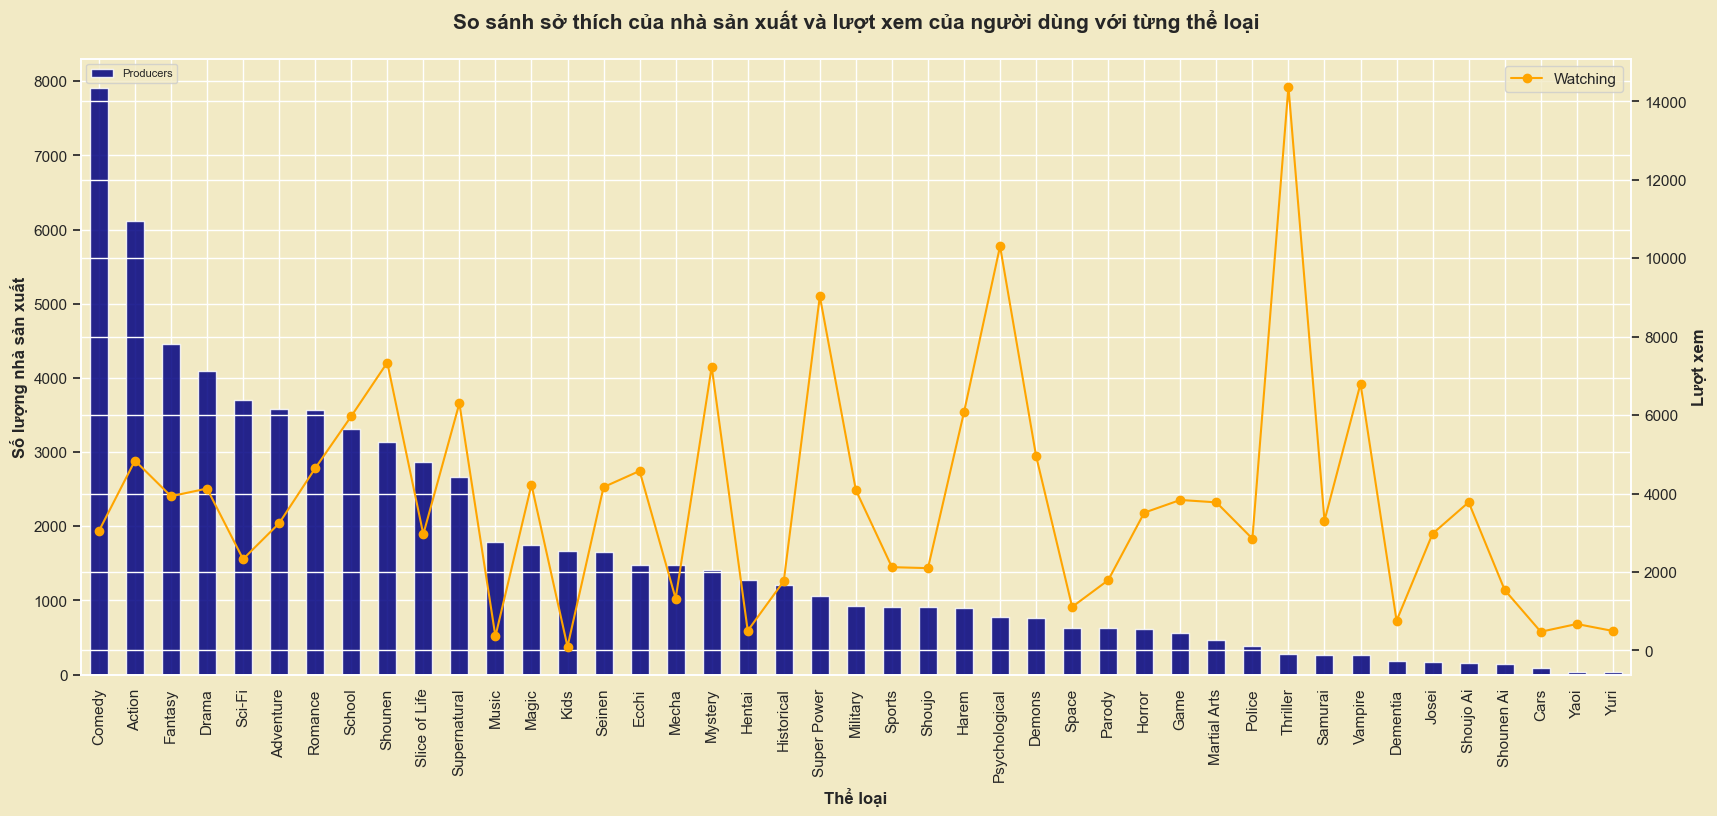

In [40]:
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
fig, ax = plt.subplots(figsize=(20,8))
new_df.plot(x='Genres',kind='bar', y='Producers', ax=ax, color="navy", alpha=0.85)
ax.set_ylabel('Số lượng nhà sản xuất', fontsize=12, weight='bold')
ax.legend(loc='upper left', fontsize=8);
ax.set_xlabel('Thể loại', fontsize=12, weight='bold')

ax2 = ax.twinx()
new_df.plot(x='Genres',y='Watching', ax=ax2, color='orange', marker='o')
ax2.set_ylabel('Lượt xem', fontsize=12, weight='bold')
ax2.set_xlabel('Thể loại', fontsize=12, weight='bold')
ax.set_title('So sánh sở thích của nhà sản xuất và lượt xem của người dùng với từng thể loại\n',fontsize=15, weight='bold');

sns.set(rc=None)

### 📖 **NHẬN XÉT:**
+ Thể loại `Thriller` được nhiều người xem nhất thì lại có rất ít nhà sản xuất lựa chọn.
+ Thể loại `Comedy` được nhiều nhà sản xuất ưa chuộng lại có lượt xem không cao đối với người dùng.
+ Những thể loại có lượt xem trung bình cao như `Thriller`, `psychology`, `Super Power` và `Mystery` (đây là top 5 thể loại có lượt xem trung bình cao nhất khảo sát trên người dùng của MAL) thì lại được ít nhà sản xuất lựa chọn để tạo ra các bộ anime.
+ Những thể loại `Comedy`, `Action` và `Fantasy` được nhiều nhà sản xuất ưa chuộng nhưng lại không có lượt xem cao. Có thể đây là 1 lựa chọn an toàn cho các nhà sản xuất hoặc cũng có thể những thể loại này là thể loại thường thức - là thể loại dễ để gắn nên các bộ anime đều có.

<a class="anchor" id="Q2"></a>
<button style="--color:#f3738a;--border:2px;--slant:.5em">Câu hỏi 2</button>

<style>
button {
  --border: 5px;    /* the border width */
  --slant: 0.7em;   /* control the slanted corners */
  --color: #37E8FC; /* the color */
  
  font-size: 35px;
  padding: 0.4em 1.2em;
  border: none;
  cursor: pointer;
  font-weight: bold;
  color: var(--color);
  background: 
     linear-gradient(to bottom left,var(--color)  50%,#0000 50.1%) top right,
     linear-gradient(to top   right,var(--color)  50%,#0000 50.1%) bottom left;
  background-size: calc(var(--slant) + 1.3*var(--border)) calc(var(--slant) + 1.3*var(--border));
  background-repeat: no-repeat;
  box-shadow:
    0 0 0 200px inset var(--s,#0000),
    0 0 0 var(--border) inset var(--color);
  clip-path: 
      polygon(0 0, calc(100% - var(--slant)) 0, 100% var(--slant),
              100% 100%, var(--slant) 100%,0 calc(100% - var(--slant))
             );
  transition: color var(--t,0.3s), background-size 0.3s;
}
button:focus-visible {
  outline-offset: calc(-1*var(--border));
  outline: var(--border) solid #000c;
  clip-path: none;
  background-size: 0 0;
}
button:hover,
button:active{
  background-size: 100% 100%;
  color: #fff;
  --t: 0.2s 0.1s;
}
button:active {
  --s: #0005;
  transition: none;
}



body {
  display:grid;
  grid-auto-flow:column;
  grid-gap:20px;
  place-content:center;
  margin:0;
  height:100vh;
}
</style>

### <span style='color:#2B9C15 '> ❓ CÂU HỎI </span>
+ **Thể loại phổ biến nhất, thời lượng mỗi tập và giới hạn độ tuổi phổ biến nhất của từng dạng phát hành của anime ?**

### <span style='color:#2B9C15 '>⭐ MỤC ĐÍCH </span>
+ Hiểu kỹ về từng dạng phát hành của anime. 
+ Khám phá được một vài thông tin về anime như thời lượng mỗi tập phát sóng của từng thể loại khác nhau như thế nào. Từ đó giúp ta hiểu hơn về đặc điểm từng dạng phát hành anime.
+ Giới hạn độ tuổi của anime liệu có khắc khe không 
+ Biết được thể loại phổ biến của từng dạng phát hành.
+ Thống kê, phân tích sâu vào từng dạng (`Type`) phát hành anime dựa vào thể loại (`Genres`), thời lượng mỗi tập (`Mins_per_ep`) và giới hạn tuổi (`Rating`) của dữ liệu.
### <span style='color:#2B9C15 '>📊 PHÂN TÍCH </span>
- Tạo cột mới `Year` để trích xuất năm từ cột `Start Date`.
- Tạo cột mới `Decade` bằng cách chia `Year` cho 10 và làm tròn xuống số nguyên gần nhất.
- Nhóm dữ liệu theo `Year` và `Decade` và tính số lượng manga phát hành theo từng năm và từng thập kỷ.
- Trực quan hóa dữ liệu bằng biểu đồ thanh để quan sát xu hướng phát hành manga theo thời gian.
+ Đầu tiên, ta sẽ tìm thể loại phổ biến nhất và giới hạn độ tuổi phổ biến nhất của từng dạng phát hành của anime
+ Sau đó ta sẽ tính thời lượng trung bình của từng dạng phát hành anime

Một bộ Anime có thể được phát hành dưới 6 dạng sau:
+ Movie
+ Music
+ ONA
+ OVA
+ Special
+ TV

### 👉 2.1 Thể loại phổ biến nhất và giới hạn độ tuổi phổ biến nhất của từng dạng phát hành của anime

**Tiền xử lý**:
Phân rã cột `Genres` sau đó gom nhóm theo cột `Type`. Tiếp theo ta sẽ đếm số lần xuất hiện của từng phân loại của `Genres` và `Rating`. Cuối cùng ta sẽ lấy phân loại xuất hiện nhiều nhất.

In [41]:
anime_copy_df = anime_df.copy()
anime_copy_df['Genres'] = anime_copy_df['Genres'].apply(eval)

df_genres_expanded = anime_copy_df.explode('Genres').reset_index()
df1 = df_genres_expanded.groupby('Type')['Genres'].value_counts() #.sort_values(ascending=False)

df1 = df_genres_expanded.groupby(['Type']).apply(lambda x: x['Genres'].value_counts().index[0])
df2 = df_genres_expanded.groupby(['Type']).apply(lambda x: x['Rating'].value_counts().index[0])

res_df = pd.DataFrame([df1, df2], index=['Thể loại phổ biến nhất', 'Giới hạn độ tuổi phổ biến nhất']).T #columns=['Movie', 'Music', 'ONA', 'OVA', 'Special', 'TV', 'Unknown']

**Phân tích**:
Kết quả ta sẽ có 1 bảng với mỗi dòng là tên dạng phát hành anime, thể loại phổ biến nhất của dạng đó và giới hạn độ tuổi phổ biến nhất của dạng đó

In [42]:
res_df

,Thể loại phổ biến nhất,Giới hạn độ tuổi phổ biến nhất
Type,,
Movie,Comedy,PG-13 - Teens 13 or older
Music,Music,G - All Ages
ONA,Comedy,PG-13 - Teens 13 or older
OVA,Hentai,PG-13 - Teens 13 or older
Special,Comedy,PG-13 - Teens 13 or older
TV,Comedy,PG-13 - Teens 13 or older
Unknown,Sci-Fi,Unknown


### 👉 2.2 Với từng dạng anime thì thời lượng trung bình của 1 tập và lượt yêu thích như thế nào ?

**Tiền xử lý và phân tích**:
Gom nhóm dữ liệu theo cột `Type` và tính trung bình dựa trên cột `Mins_per_ep` ta được thời lượng trung bình mỗi tập và tính trung bình trên cột `Favorite` ta được lượt yêu thích của từng dạng anime.

In [43]:
df1 = anime_copy_df.groupby('Type')['Favorites'].mean().sort_values()
df1 = pd.DataFrame(df1)

df2 = anime_copy_df.groupby('Type')['Mins_per_ep'].mean().sort_values()
df2 = pd.DataFrame(df2)

new_df = df2.merge(df1, on='Type').reset_index()

new_df = new_df.sort_values(by='Mins_per_ep', ascending=False)

**Trực quan hóa**:
Ta sẽ dùng biểu đồ kết hợp giữa cột và đường với 2 trục y khác nhau, trong đó:
+ Biểu đồ cột thể hiện thời lượng mỗi tâp, tính theo phút. Sử dụng trục y bên trái
+ Biểu đồ đường thể hiện lượt yêu thích trung bình. Sử dụng trục y bên phải

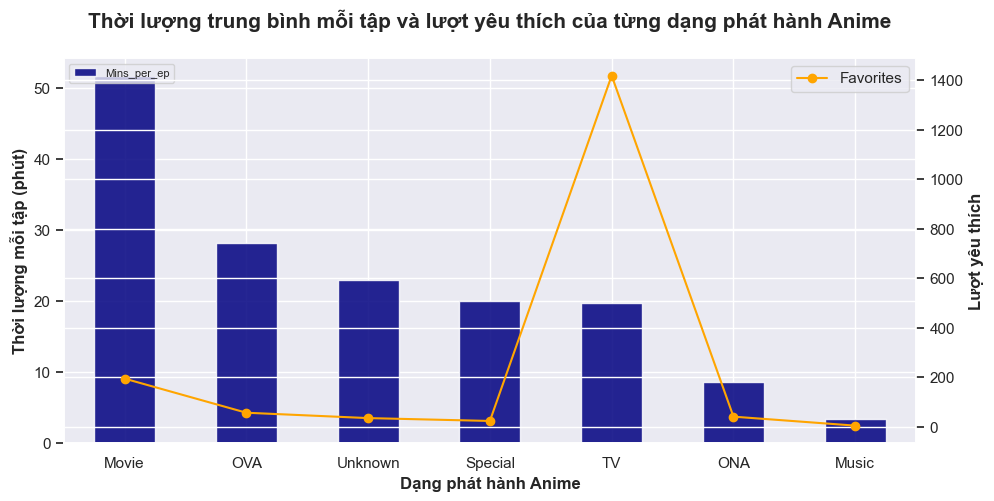

In [44]:
fig, ax = plt.subplots(figsize=(11,5))
new_df.plot(x='Type',kind='bar', y='Mins_per_ep', ax=ax, color="navy", alpha=0.85, rot=0)
ax.set_ylabel('Thời lượng mỗi tập (phút)', fontsize=12, weight='bold')
ax.legend(loc='upper left', fontsize=8);
ax.set_xlabel('Dạng phát hành Anime', fontsize=12, weight='bold')

ax2 = ax.twinx()
new_df.plot(x='Type',y='Favorites', ax=ax2, color='orange', marker='o', rot=0)
ax2.set_ylabel('Lượt yêu thích', fontsize=12, weight='bold')
ax2.set_xlabel('Type of anime', fontsize=12, weight='bold')
ax.set_title('Thời lượng trung bình mỗi tập và lượt yêu thích của từng dạng phát hành Anime\n',fontsize=15, weight='bold');


### 📖 **NHẬN XÉT:**
+ Thời lượng mỗi tập của Movie anime là cao nhất (hơn 50 phút cho 1 tập) và thấp nhất là dạng Music anime chỉ cỡ 3-5 phút cho 2 tập.
+ Dạng được yêu thích nhất là TV thường có thời lượng mỗi tập rơi vào khoảng 20 phút.

<a class="anchor" id="Q3"></a>
<button style="--color:#f3738a;--border:2px;--slant:.5em">Câu hỏi 3</button>

<style>
button {
  --border: 5px;    /* the border width */
  --slant: 0.7em;   /* control the slanted corners */
  --color: #37E8FC; /* the color */
  
  font-size: 35px;
  padding: 0.4em 1.2em;
  border: none;
  cursor: pointer;
  font-weight: bold;
  color: var(--color);
  background: 
     linear-gradient(to bottom left,var(--color)  50%,#0000 50.1%) top right,
     linear-gradient(to top   right,var(--color)  50%,#0000 50.1%) bottom left;
  background-size: calc(var(--slant) + 1.3*var(--border)) calc(var(--slant) + 1.3*var(--border));
  background-repeat: no-repeat;
  box-shadow:
    0 0 0 200px inset var(--s,#0000),
    0 0 0 var(--border) inset var(--color);
  clip-path: 
      polygon(0 0, calc(100% - var(--slant)) 0, 100% var(--slant),
              100% 100%, var(--slant) 100%,0 calc(100% - var(--slant))
             );
  transition: color var(--t,0.3s), background-size 0.3s;
}
button:focus-visible {
  outline-offset: calc(-1*var(--border));
  outline: var(--border) solid #000c;
  clip-path: none;
  background-size: 0 0;
}
button:hover,
button:active{
  background-size: 100% 100%;
  color: #fff;
  --t: 0.2s 0.1s;
}
button:active {
  --s: #0005;
  transition: none;
}



body {
  display:grid;
  grid-auto-flow:column;
  grid-gap:20px;
  place-content:center;
  margin:0;
  height:100vh;
}
</style>

### <span style='color:#2B9C15 '> ❓ CÂU HỎI </span>
+ **Số lượng anime được sản xuất qua từng năm và những năm nào có nhiều bộ anime được đánh giá cao nhất**

### <span style='color:#2B9C15 '>⭐ MỤC ĐÍCH </span>
+ Nhìn thấy được thời điểm bùng nổ của anime và chứng kiến được sự phát triển của anime.
+ Khám phá được "năm huyền thoại" - năm của những bộ anime được đánh giá cao trong lòng người xem.
+ Xem xét số lượng anime được phát hành qua mỗi năm thay đổi như thế nào
+ Thống kê, phân tích đánh giá của người dùng đối với anime qua các năm dựa trên trung bình lượt đánh giá 10 điểm 

### <span style='color:#2B9C15 '>📊 PHÂN TÍCH </span>
+ Đầu tiên, ta đi tính số lượng anime được phát hành qua từng năm và số lượng anime được sản xuất qua từng thập kỉ
+ Tiếp theo, ta sẽ tính số lượng trung bình người đánh giá 10 điểm cho các bộ anime của từng năm.

### 👉 3.1 Số lượng anime được sản xuất qua từng năm và từng thập kỉ

**Tiền xử lý và phân tích**:
Ta sẽ thêm cột `Year` và cột `Decade` vào tập dữ liệu. Sau đó gom nhóm và tính số lượng anime

In [45]:
df_copy = anime_df.copy()
df_copy['Start Date'] = pd.to_datetime(df_copy['Start Date'], errors='coerce')

df_copy['Year'] = df_copy['Start Date'].dt.year.astype('Int64')
df_copy['Decade'] = df_copy['Year'] // 10 * 10

anime_per_year = df_copy.groupby('Year').size().reset_index(name='Count')
anime_per_decade = df_copy.groupby('Decade').size().reset_index(name='Count')

**Trực quan hóa**: Dùng 2 biểu đồ cột, 1 cái biểu diễn số lượng anime qua từng năm và 1 cái biểu diễn số anime qua từng thập kỉ.


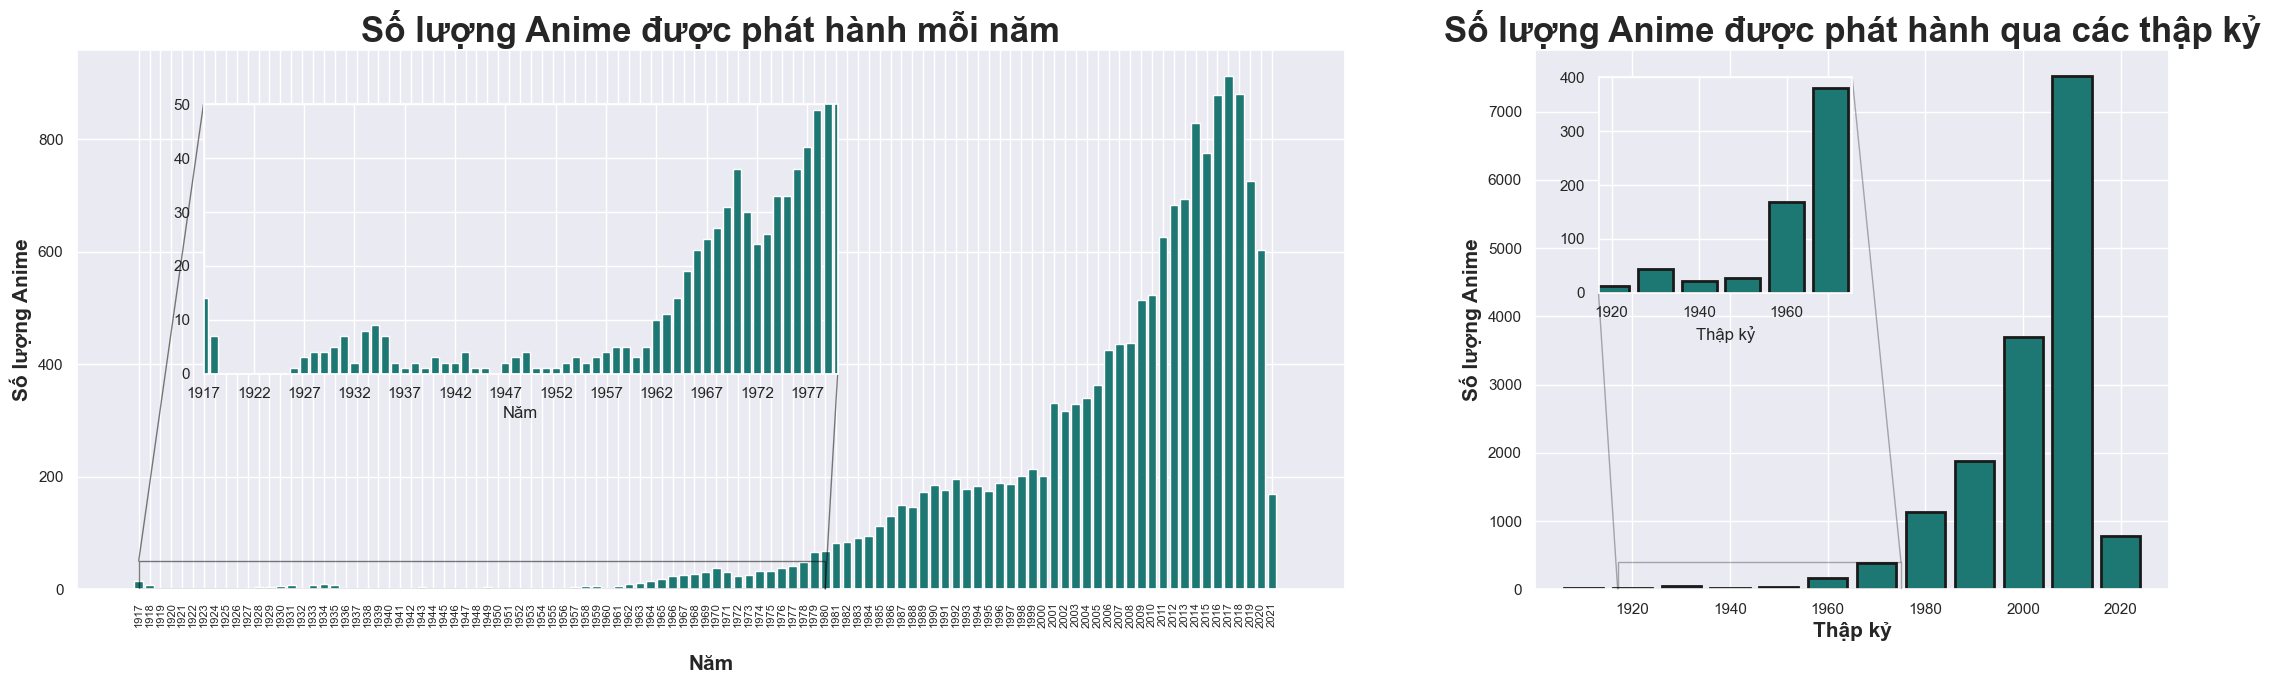

In [46]:
sns.set(rc=None)
fig, axes = plt.subplots(1, 2, figsize=(27, 7), gridspec_kw={'width_ratios': [2, 1]})

axes[0].bar(anime_per_year['Year'], anime_per_year['Count'], color="#1d7874")
axes[0].set_title('Số lượng Anime được phát hành mỗi năm', fontsize=25, weight='bold')
axes[0].set_xlabel('\nNăm', fontsize=15, weight='bold')
axes[0].set_ylabel('Số lượng Anime', fontsize=15, weight='bold')
axes[0].set_xticks(range(1917, 2022, 1))
axes[0].set_xticklabels(range(1917, 2022, 1),rotation=90, fontsize=8)

axin = axes[0].inset_axes([0.1, 0.4, 0.5, 0.5])
axin.bar(anime_per_year['Year'], anime_per_year['Count'], color="#1d7874", width=0.8)
axin.set_xlim(1917, 1980)
axin.set_ylim(0, 50)
axin.set_xticks(range(1917, 1980, 5))
axin.set_xlabel('Năm')
axin.set_ylabel('')

axes[0].indicate_inset_zoom(axin, edgecolor="black", linewidth=1, alpha=0.5)

axes[1].bar(anime_per_decade['Decade'], anime_per_decade['Count'], color="#1d7874", width=8, linewidth=2, edgecolor='k')
axes[1].set_title('Số lượng Anime được phát hành qua các thập kỷ', fontsize=25, weight='bold')
axes[1].set_xlabel('Thập kỷ', fontsize=15, weight='bold')
axes[1].set_ylabel('Số lượng Anime', fontsize=15, weight='bold')

axin = axes[1].inset_axes([0.1, 0.55, 0.4, 0.4])
axin.bar(anime_per_decade['Decade'], anime_per_decade['Count'], color="#1d7874", width=8, linewidth=2, edgecolor='k')
axin.set_xlim(1917, 1975)
axin.set_ylim(0, 400)
axin.set_xlabel('Thập kỷ')
axin.set_ylabel('')
axes[1].indicate_inset_zoom(axin, edgecolor="black", linewidth=1, alpha=0.3)

plt.show()

### 📖 **NHẬN XÉT:**

Hai biểu đồ không chỉ giúp chúng ta phân tích số lượng anime được phát hành mà còn cung cấp những hiểu biết sâu sắc về sự phát triển của ngành công nghiệp anime của Nhật Bản. Từ sự khởi đầu sớm nhất vào đầu những năm 1900 cho đến hiện tượng toàn cầu như ngày nay, lịch sử và sự phát triển của anime là một câu chuyện hấp dẫn.

+ **Tổng quan**

Điều đáng chú ý là số lượng anime phát hành tăng dần qua các năm nhưng lại giảm đáng kể trong những năm gần đây (2020 trở đi). Số lượng anime phát hành cũng như quá trình phát triển của ngành anime Nhật Bản có thể chia thành ba giai đoạn chính:

+ **Giai đoạn đầu (1917-1960)**

Đây là giai đoạn đầu tiên của anime, khi các kỹ thuật sản xuất anime vẫn còn sơ khai. Ở giai đoạn này, số lượng anime được phát hành còn hạn chế, chỉ tầm vài bộ mỗi năm và cao nhất chỉ tầm 15 bộ anime vào năm 1917 và năm 1934.

+ **Giai đoạn phát triển (1960-2000)**

Trong giai đoạn này, số lượng anime phát hành tăng lên so với giai đoạn trước, đánh dấu sự khởi đầu cho sự phát triển của ngành anime Nhật Bản. Số lượng anime phát hành tăng dần qua mỗi năm, cao nhất lên đến 200 bộ anime vào năm 1999. Một số bộ anime nổi tiếng của giai đoạn này bao gồm Mobile Suit Gundam (1979), Akira (1988), Ghost in the Shell (1995), Dragon Ball Z (1996), Sailor Moon (1992) và Pokemon (1997).

+ **Giai đoạn toàn cầu hóa (2000-2010)**

Giai đoạn này chứng kiến sự gia tăng đáng kể về số lượng anime phát hành so với giai đoạn trước (từ 200 anime/năm lên hơn 500 anime/năm). Đó cũng là thời điểm ngành công nghiệp anime Nhật Bản mở rộng ra toàn cầu với những tác phẩm nổi tiếng như  Ben 10, Naruto, Spirited Away, v.v.

+ **2010-nay: Đỉnh cao và Suy thoái gần đây**

Từ năm 2010 đến năm 2018 có thể nói đây là đỉnh cao, là sự bùng nổ của công nghiệp anime Nhật Bản. Trong những năm này, số lượng anime sản xuất hàng năm tăng đột biến so với giai đoạn trước, từ 500 anime/năm tăng dần đến hơn 900 anime/năm. Đỉnh điểm là năm  2018 lên đến gần 1,000 anime được sản xuất.

   Thế nhưng bắt đầu từ năm 2019 thì số lượng anime giảm đáng kể, có lẽ trước sự bùng nổ của dich Covid đã giáng 2 đòn nặng nề vào ngành anime. Vào năm 2019, 2020 có thể thấy sự giảm mạnh của số lượng anime, đây là thời điểm căng thẳng của dịch bệnh nên có lẽ như vậy đã đình trệ sự sản xuất của anime.

### 👉 3.2 Trung bình số người đánh giá 10 điểm cho các anime qua từng năm

**Tiền xử lý và phân tích**:
Thêm cột `Year` vào tập dữ liệu, đây là cột tách từ `Start Date` để biểu diễn năm phát hành của anime. Sau đó gom nhóm dữ liệu theo cột `Year` và tính trung bình số lượng người đánh giá 10 điểm cho các bộ anime qua từng năm.

In [47]:
df_copy = anime_df.copy()
df_copy['Start Date'] = pd.to_datetime(df_copy['Start Date'], errors='coerce')

df_copy['Year'] = df_copy['Start Date'].dt.year.astype('Int64')
df1 = df_copy.groupby('Year')['Score-10'].mean().reset_index(name='Num_10')
df1.sort_values(by='Num_10', ascending=False).head(10)

,Year,Num_10
81,2006,4977.828235
86,2011,4671.404153
83,2008,4396.682648
90,2015,4330.190968
91,2016,4323.966970
89,2014,4100.554885
87,2012,3980.866569
84,2009,3945.068093
88,2013,3731.816739
82,2007,3528.717890


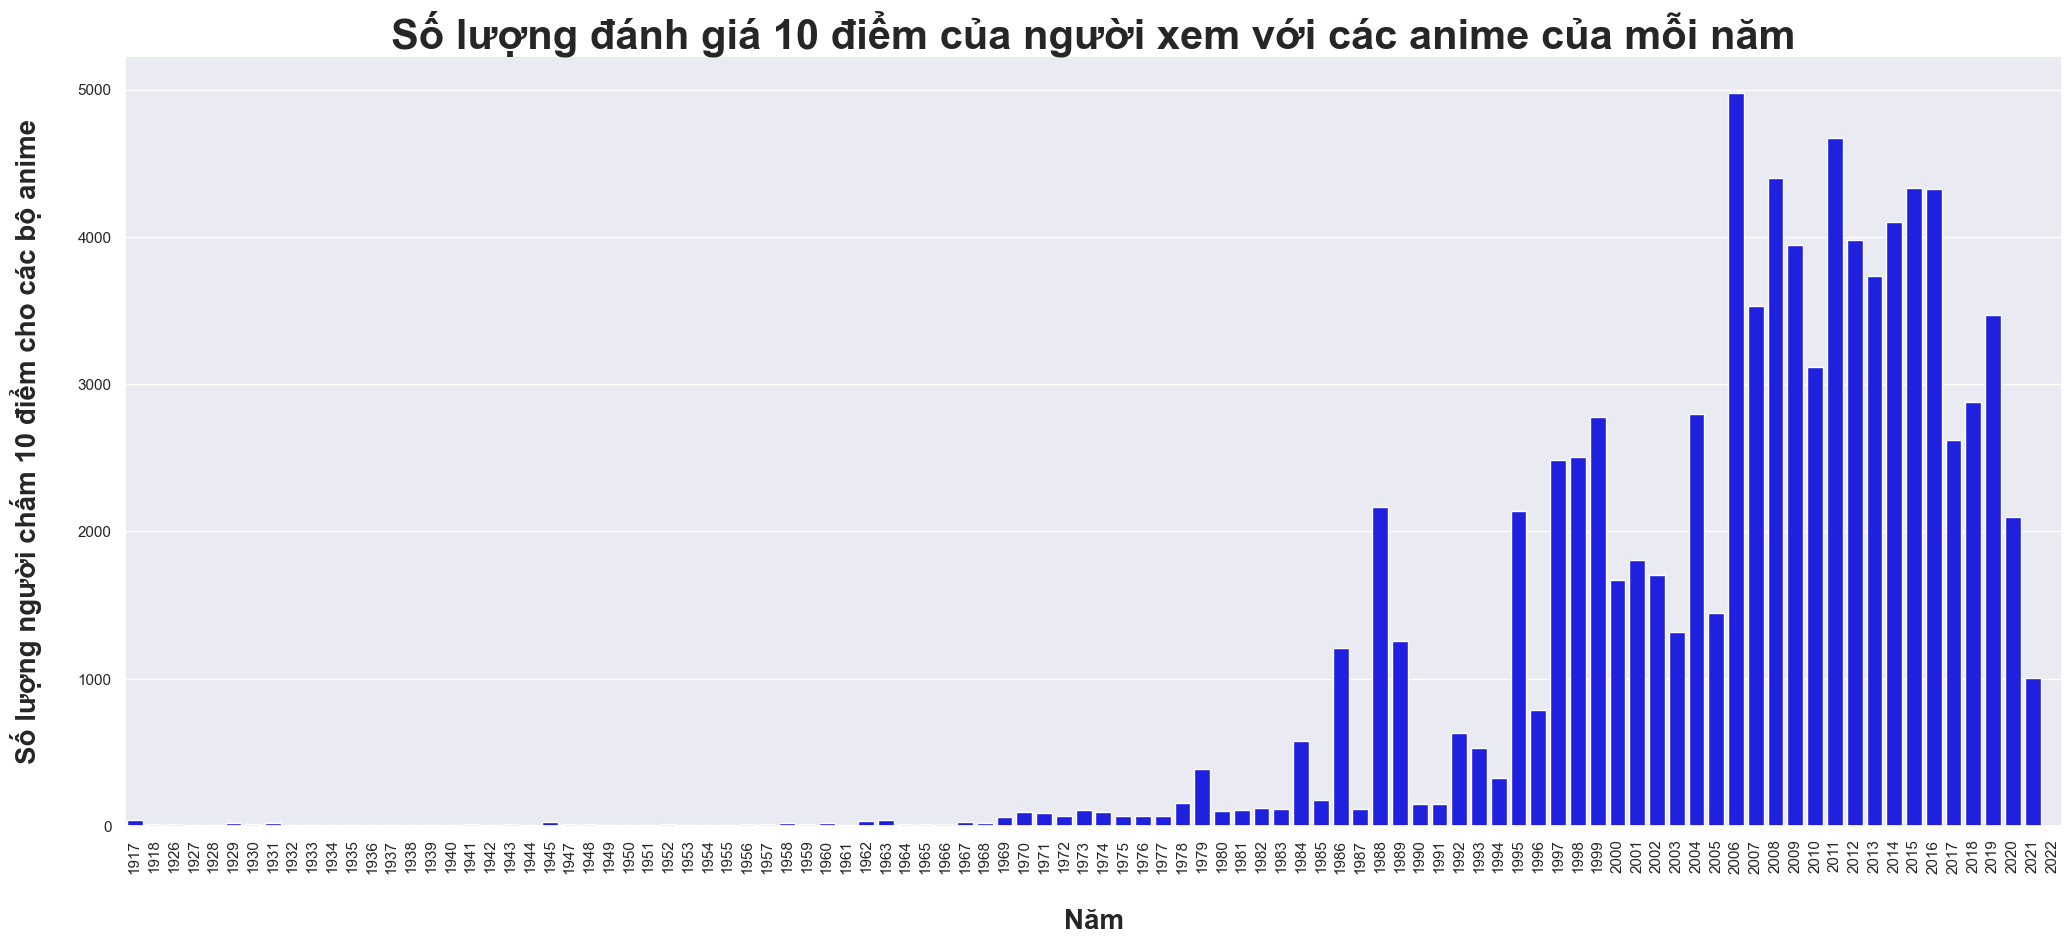

In [48]:
plt.figure(figsize=(25,10))
p = sns.barplot(x=df1['Year'], y=df1['Num_10'], color='blue')
p.set_xticklabels(p.get_xticklabels(),rotation=90);
p.set_title('Số lượng đánh giá 10 điểm của người xem với các anime của mỗi năm', fontsize=30, weight='bold')
p.set_xlabel('\nNăm', fontsize=20, weight='bold')
p.set_ylabel('Số lượng người chấm 10 điểm cho các bộ anime\n', fontsize=20, weight='bold');

### 📖 **NHẬN XÉT:**
+ Giai đoạn từ 1917 đến 1979, đây là những năm sơ khai của anime nên các thể loại và kỹ thuật sản xuất anime chưa phát triển nên người xem cũng không có nhiều đánh giá cao đối với những anime trong giai đoạn này.

+ Giai đoạn từ 1980 đến 2005, đây là giai đoạn đã bắt đầu phát triển của anime nên các đánh giá của người xem cũng từ đó tăng lên.

+ Giai đoạn từ năm 2005 đến nay có lẽ là ngành anime ngày càng đáp ứng đúng thị hiều của người dùng nên có rất nhiều anime lấy được điểm 10 đánh giá từ người dùng.

+ Năm 'huyền thoại' đối với người xem có lẽ là năm 2006, 2011 và 2008. Đây là 3 năm đạt được nhiều đánh giá 10 điểm từ người xem.

<a class="anchor" id="Q4"></a>
<button style="--color:#f3738a;--border:2px;--slant:.5em">Câu hỏi 4</button>

<style>
button {
  --border: 5px;    /* the border width */
  --slant: 0.7em;   /* control the slanted corners */
  --color: #37E8FC; /* the color */
  
  font-size: 35px;
  padding: 0.4em 1.2em;
  border: none;
  cursor: pointer;
  font-weight: bold;
  color: var(--color);
  background: 
     linear-gradient(to bottom left,var(--color)  50%,#0000 50.1%) top right,
     linear-gradient(to top   right,var(--color)  50%,#0000 50.1%) bottom left;
  background-size: calc(var(--slant) + 1.3*var(--border)) calc(var(--slant) + 1.3*var(--border));
  background-repeat: no-repeat;
  box-shadow:
    0 0 0 200px inset var(--s,#0000),
    0 0 0 var(--border) inset var(--color);
  clip-path: 
      polygon(0 0, calc(100% - var(--slant)) 0, 100% var(--slant),
              100% 100%, var(--slant) 100%,0 calc(100% - var(--slant))
             );
  transition: color var(--t,0.3s), background-size 0.3s;
}
button:focus-visible {
  outline-offset: calc(-1*var(--border));
  outline: var(--border) solid #000c;
  clip-path: none;
  background-size: 0 0;
}
button:hover,
button:active{
  background-size: 100% 100%;
  color: #fff;
  --t: 0.2s 0.1s;
}
button:active {
  --s: #0005;
  transition: none;
}



body {
  display:grid;
  grid-auto-flow:column;
  grid-gap:20px;
  place-content:center;
  margin:0;
  height:100vh;
}
</style>

### <span style='color:#2B9C15 '> ❓ CÂU HỎI </span>
+ **Số lượng anime được phát hành thay đổi như thế nào qua các mùa khác nhau trong năm? Có xu hướng rõ ràng nào trong việc phân phối anime phát hành theo mùa không?**

### <span style='color:#2B9C15 '>⭐ MỤC ĐÍCH </span>
- Tìm hiểu lịch sử phát triển của anime: Theo dõi quá trình phát triển của ngành anime từ giai đoạn đầu cho đến ngày nay.
- Xác định xu hướng phát hành anime: Quan sát số lượng anime phát hành đã thay đổi như thế nào theo thời gian và xác định bất kỳ thay đổi hoặc khuôn mẫu đáng kể nào.

### <span style='color:#2B9C15 '>📊 PHÂN TÍCH </span>
- Tạo cột mới `Year` để trích xuất năm từ cột `Start Date`.
- Tạo cột mới `Decade` bằng cách chia `Year` cho 10 và làm tròn xuống số nguyên gần nhất.
- Nhóm dữ liệu theo `Year` và `Decade` và tính số lượng manga phát hành theo từng năm và từng thập kỷ.
- Trực quan hóa dữ liệu bằng biểu đồ thanh để quan sát xu hướng phát hành manga theo thời gian.

### 👉 4.1 Tiền xử lý

Ở cột `Start Date`, loại bỏ hết các giá trị NaN, chuẩn hóa bằng cách chỉ giữu lại tháng, sau đó lưu vào cột `Month`

In [50]:
anime_copy = anime_df.copy()
anime_copy.dropna(subset=['Start Date'], inplace=True)
anime_copy['Start Date'] = pd.to_datetime(anime_copy['Start Date'], errors='coerce').dt.normalize()
anime_copy['Month'] = anime_copy['Start Date'].dt.month.astype('Int64')

### 👉 4.2 Phân theo mùa và thập kỷ

- Tạo một danh sách tên là `seasons` bao gồm các mùa *Spring*, *Summer*, *Fall*, và *Winter*.
- Sử dụng phương thức pd.cut để phân chia cột `Month` vào các khoảng thời gian tương ứng với các mùa và gán nhãn tương ứng từ danh sách `seasons`.

- Tạo một cột mới tên là `Decade`, tính bằng cách lấy năm trong 'Start Date', chia cho 10, loại bỏ phần thập phân và nhân với 10 để xác định thập kỷ.
- Lọc dữ liệu để chỉ bao gồm các dòng từ năm 1990 trở đi. Bởi vì từ những câu hỏi trên ta có thể thấy rằng khoảng thời gian trước 1990, anime không quá phát triến.
- Nhóm dữ liệu theo `Decade` và `Season` và đếm số lượng anime trong mỗi nhóm.

In [51]:
# Define seasons
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
anime_copy['Season'] = pd.cut(anime_copy['Month'], bins=[0, 3, 6, 9, 12], labels=seasons, include_lowest=True)

# Group by Decade and Season
anime_copy['Decade'] = (anime_copy['Start Date'].dt.year // 10) * 10
anime_per_season = anime_copy[anime_copy['Decade'] >= 1990].groupby(['Decade', 'Season']).size().reset_index(name='Count')

### 👉 4.3 Tính tỷ lệ phần trăm số lượng anime mỗi mùa so với tổng số lượng anime của mỗi thập kỷ.

In [52]:
# Calculate percentage
anime_per_season['Percentage'] = anime_per_season['Count'] / anime_per_season.groupby('Decade')['Count'].transform('sum') * 100

anime_per_season.head()

,Decade,Season,Count,Percentage
0,1990,Spring,403,21.379310
1,1990,Summer,484,25.676393
2,1990,Fall,492,26.100796
3,1990,Winter,506,26.843501
4,2000,Spring,782,21.169464


### 👉 4.3 Trực quan hóa 

- Trực quan hóa biểu đồ tỷ lệ phần trăm:
    - Dữ liệu được nhóm lại theo cột 'Decade' và 'Season' và tính tổng tỷ lệ phần trăm.
    - Sử dụng phương pháp `.plot(kind='area', stacked=True, ax=ax[0])` để vẽ biểu đồ diện tích (area chart) với dữ liệu xếp chồng lên nhau trên trục ax[0] (biểu đồ bên trái).
    - Đặt tiêu đề, nhãn cho trục x và y, và chỉ định vị trí cho legend.
    - Đặt các đánh dấu trục x theo các thập kỷ từ 1990 đến 2030.
- Trực quan hóa biểu đồ số lượng:
    - Tương tự, dữ liệu được nhóm lại và tổng số lượng được tính bằng `.sum().unstack().plot(kind='bar', stacked=True, ax=ax[1])` để vẽ biểu đồ với dữ liệu xếp chồng lên nhau trên trục ax[1] (biểu đồ bên phải).
    - Đặt tiêu đề, nhãn cho trục x và y, và chỉ định vị trí cho legend.
    - Đặt nhãn trục x theo các thập kỷ mà không xoay nhãn.

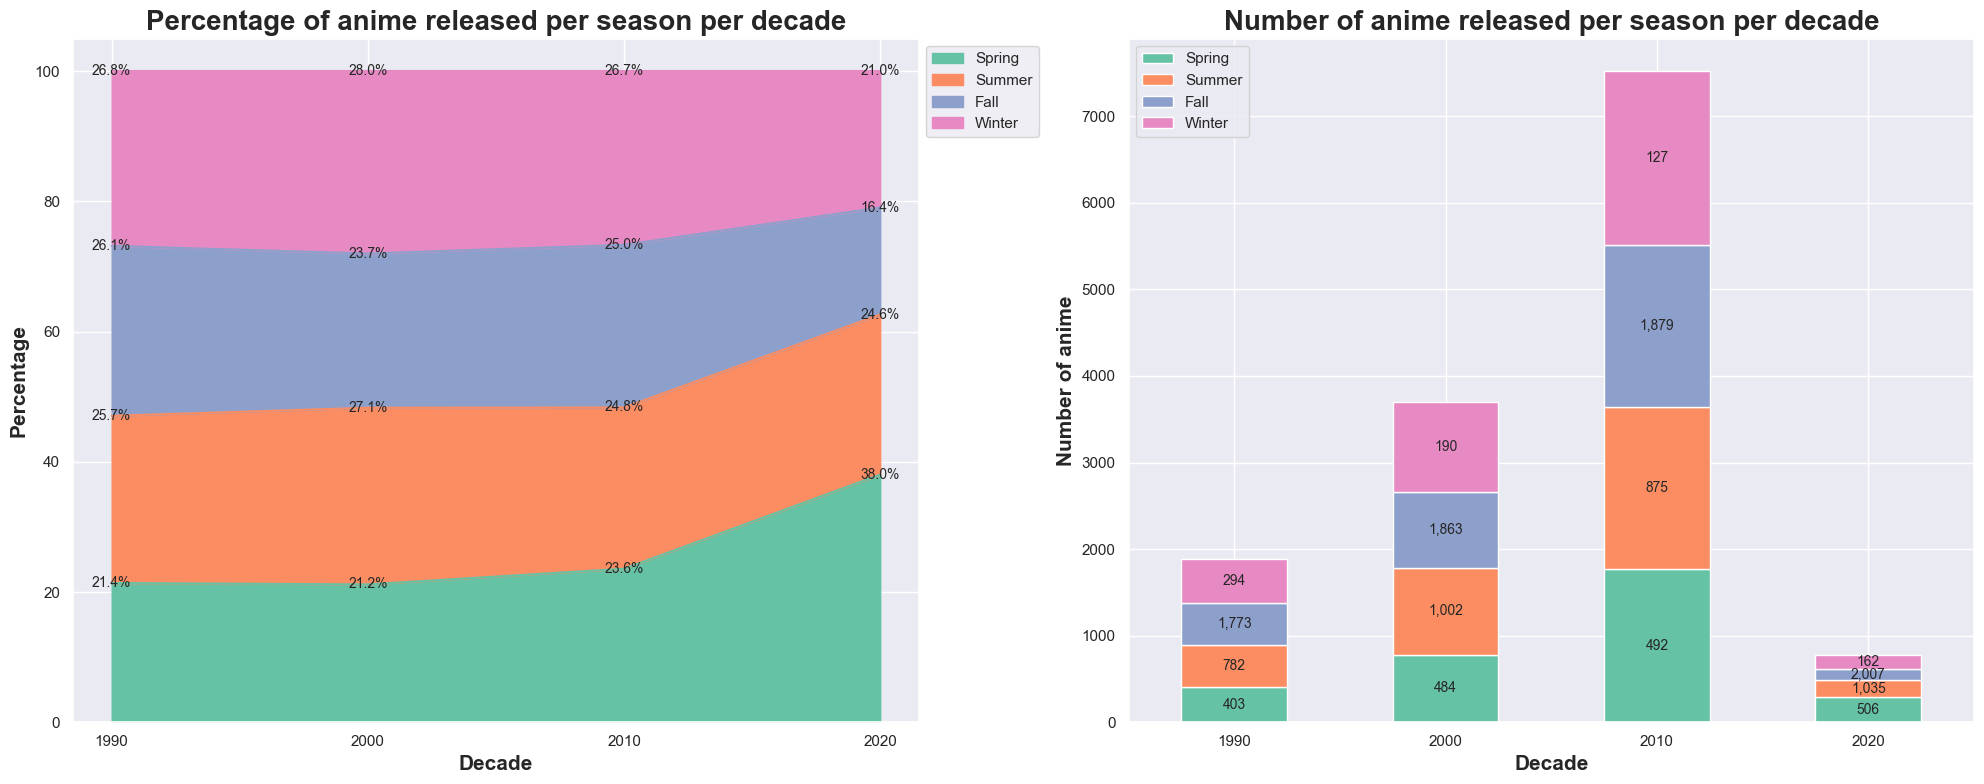

In [53]:
#sns.set(style="darkgrid")
sns.set_palette("Set2")

fig, ax = plt.subplots(1, 2, figsize=(20, 8))

anime_per_season.groupby(['Decade', 'Season'])['Percentage'].sum().unstack().plot(kind='area', stacked=True, ax=ax[0])
ax[0].set_title('Percentage of anime released per season per decade', fontsize=20, weight='bold')
ax[0].set_xlabel('Decade', fontsize=15, weight='bold')
ax[0].set_ylabel('Percentage', fontsize=15, weight='bold')
ax[0].legend(loc='upper left', bbox_to_anchor=(1, 1, 0, 0))
ax[0].set_xticks(range(1990, 2030, 10))

anime_per_season.groupby(['Decade', 'Season'])['Count'].sum().unstack().plot(kind='bar', stacked=True, ax=ax[1])
ax[1].set_title('Number of anime released per season per decade', fontsize=20, weight='bold')
ax[1].set_xlabel('Decade', fontsize=15, weight='bold')
ax[1].set_ylabel('Number of anime', fontsize=15, weight='bold')
ax[1].legend(loc='upper left')
ax[1].set_xticklabels(anime_per_season['Decade'].unique(), rotation=0)

for decade, row in anime_per_season.groupby('Decade'):
    if decade in ax[0].get_xticks():
        temp = 0
        for season, percentage in row.set_index('Season')['Percentage'].items():
            x_pos = decade
            temp += percentage
            y_pos = temp
            ax[0].text(x_pos, y_pos, f"{percentage:.1f}%", ha='center', va='center', fontsize=10)

bars = ax[1].patches
for bar, (index, decade, season, count) in zip(bars, anime_per_season[['Decade', 'Season', 'Count']].itertuples()):
    x_pos = bar.get_x() + bar.get_width() / 2
    y_pos = bar.get_y() + bar.get_height() / 2
    ax[1].text(x_pos, y_pos, f"{count:,}", ha='center', va='center', fontsize=10)

plt.tight_layout()
plt.show()


### 📖 **NHẬN XÉT:**
- Từ hai biểu đồ có tên là *Tỷ lệ phần trăm anime được phát hành theo mùa mỗi thập kỷ* và *Số lượng anime được phát hành theo mùa mỗi thập kỷ*, ta có thể có những nhận xét sau:
- Ở biểu đồ bên trái, chúng ta có thể thấy rằng:
    - Trong thập kỷ 1990, mùa xuân và mùa hè có tỷ lệ phát hành anime gần như ngang nhau, xấp xỉ 26%, trong khi mùa thu nổi trội hơn một chút với khoảng **27%**. Mùa đông có tỷ lệ phát hành thấp nhất, khoảng **21%**.
    - Trong thập kỷ 2000, mùa thu bắt đầu tăng tỷ lệ phát hành, đạt gần **28%**, và xu hướng này tiếp tục tăng lên đến hơn **38%** vào thập kỷ 2010.
    - Mùa đông cũng thấy sự tăng nhẹ từ khoảng **21%** lên **24-26%**.
    - Mùa xuân và mùa hè có sự giảm nhẹ về tỷ lệ phát hành qua các thập kỷ.
- Còn về biểu đồ bên phải, chúng ta có thể thấy rằng:
    - Có một sự tăng trưởng mạnh mẽ về số lượng anime được phát hành từ thập kỷ 1990 đến 2010, với số lượng tăng từ vài trăm đến vài ngàn.
    - Có vẻ như mùa thu là mùa phổ biến nhất cho việc phát hành anime, với số lượng lớn nhất trong mọi thập kỷ.
    - Sự chênh lệch giữa các mùa có vẻ trở nên rõ ràng hơn qua các thập kỷ, với mùa thu và mùa đông có sự tăng trưởng đáng kể so với mùa xuân và mùa hè.
- Từ đó câu trả lời câu hỏi về việc thay đổi số lượng anime được phát hành qua các mùa: Có một xu hướng rõ ràng là mùa thu thường có số lượng anime được phát hành nhiều nhất, tiếp theo là mùa đông, mùa xuân và cuối cùng là mùa hè. Sự phân phối này có thể phản ánh các yếu tố như ngân sách sản xuất, mùa vụ tiêu dùng, và các kỳ nghỉ lễ, khi mà người xem có nhiều thời gian rảnh hơn để theo dõi anime. Điều này cũng có thể liên quan đến các sự kiện văn hóa và lễ hội diễn ra trong năm tại Nhật Bản, nơi mà hầu hết anime được sản xuất và phát hành.

<a class="anchor" id="4"></a>
## <div style="text-align: left; background-color:#EDC0C7; font-family:newtimeroman;color: black; padding: 14px; line-height: 1;border-radius:10px">4. Cảm nghĩ</div>

### 👉 4.1 Trong quá trình làm, những khó khăn mà em gặp phải là gì? 

#### Đoàn Ngọc Mai_21127104
- Tập dữ liệu quá lớn nên có nhiều vấn đề rắc rối phải xử lý.
- Em có dự định làm hệ thống dự đoán điểm cho bộ anime để đề cử cho độc giả dựa vào năm phát và dựa vào các cột là Watching, Members và Favorites, nhưng mà như em đã nói phía trên để thực hiện dự đoán thì phải tiền xử lý cho thật tốt. Tốt ở đây là bao gồm xử lý khéo phần giá trị thiếu, và đảm bảo chính xác tính đúng đắn của dữ liệu. Và do em nói là tập dữ liệu lớn nên không xử lý tốt được dẫn đến việc thực hiện câu hỏi này gặp nhiều khó khăn nên không hoàn thành được như dự kiến
- Khó khăn trong việc quản lý thời gian để hoàn thành bài tập giữa các môn và các deadline của môn

### 👉 4.2 Em đã học được những gì?

#### Đoàn Ngọc Mai_21127104
- Học đươc cách sử dụng Github
- Hiểu rõ hơn về quy trình xử lý dữ liệu, hiểu biết sơ bộ về quy trình thực hiện một kế hoạch trong Khoa Học Dữ Liệu
- Nâng cao kỹ năng sử dụng các thư viện từ Python
- Hiểu biết sơ bộ về cách train và test model và biết về nhiều model hơn

### 👉 4.3 Nếu có thêm thời gian, em sẽ làm thêm những gì?

#### Đoàn Ngọc Mai_21127104
- Em sẽ hoàn thành phần làm hệ thống dự đoán điểm cho bộ anime để đề cử cho độc giả dựa vào năm phát và dựa vào các cột là Watching, Members và Favorites. 
- Tìm những câu hỏi có ý nghĩa, mang tính thực tiễn hơn và phân tích nhiều hơn về tập dữ liệu hiện tại.

<a class="anchor" id="5"></a>
## <div style="text-align: left; background-color:#EDC0C7; font-family:newtimeroman;color: black; padding: 14px; line-height: 1;border-radius:10px">5. Tài liệu tham khảo</div>

1. [Dataset Anime Recommendation Database 2020](https://www.kaggle.com/datasets/hernan4444/anime-recommendation-database-2020)
2. [Slides in Moodle](https://drive.google.com/drive/folders/1WBgeLNoWVuWRaGrp2i6Z4tAEn8IpFqpq)